In [2]:
import random
import numpy as np
import sys
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as fin
from matplotlib.dates import date2num
import tushare as ts

In [13]:
#nd array review
#创建array
a=np.zeros(10)
a.dtype
np.empty(100)#random array
np.arange(2,10,0.3) #step size is 0.3, defualt step size is 1
np.linspace(0,100,101)#101 is array length which can be denoted by user
np.eye(10) #diagonal matrix

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [36]:
#nd array 索引和切片
#a+b
#a>b
a=np.arange(15).reshape((3,5)) # 2d arrary
a[0][0]
a[0,0]
#difference between list and arrary
a=np.array(10)
b=list(range(10))
#c=a[0:4]
d=b[0:4]
#c[0]=20
d[0]=20
#slicing an array is to make a projection(changing the copy will change the array itself) while slicing a list is making a copy(changing the copy 
#will not change the list itself)
#列表是浅拷贝，数组是赋值
a[0:2,0:2] #get value from rows and columns

In [42]:
#布尔索引
a=[random.randint(0,10) for i in range(20)]
filter(lambda x:x>5,a)
a=np.array(a)
a[a>5]
#& and difference
#&是一个位运算符，运算优先级比较高 因此在多个条件并行时，每个条件记得括起来
a[(a>5)&(a%2==0)]
a[(a>5)| (a%2==0)]

array([10,  9,  8,  8, 10,  2,  7,  9,  4,  9,  2])

In [48]:
#花式索引
#一维数组
a=np.arange(20)
a[[1,3,4,6,7]]
#高维数组
a=np.arange(20).reshape(4,5)
a[0,2:3]
a[0,a[0]>2]
a[[1,3],[1,3]]#take [1,1] value and [3,3] value from a
a[[1,3],:] #slicing first and third row with all columns
a[[1:3],:][:,[1,3]] #slicing row first(row 1 and 3) and keep all columns , then slicing columns(col 1 and 3) and keep all rows

array([ 6, 18])

In [61]:
#通用函数 abs sqrt ceil float
a=1.6
int(a) #向数轴上零的方向取整
floor(a) #向下取整
ceil(a) #向上取整
round(a) #四舍五入
a=np.arange(-5.5,5.5)
#np.floor(a)

NameError: name 'floor' is not defined

In [67]:
a=np.arange(-5.5,5.5)
np.modf(a) #seperate int part and decimal part of the array
#isnan special float, it does not equal to any existing float(including nan itself)
float('nan')
np.nan==np.nan
#isinf special float, bigger than any other float(but equal to itself)
np.inf==np.inf

True

In [80]:
#numpy统计方法和随时数
#a.var()
#a.std() #95% falls in +-2 std
#a.argmax() #return index of max value
random.choice([1,3,4,5])
a=[1,3,4,5]
random.shuffle(a)
np.random.randint(0,10,(3,5,4)) #np array shape is defined
np.random.uniform(2,4,10) #a uniform distribution from 2 to 4, 10 samples

array([2.77649497, 2.20361882, 3.28979534, 2.22876002, 2.91326936,
       2.32943863, 2.5258496 , 3.77748749, 2.92369837, 3.0683841 ])

In [93]:
#series (pandas 数据包）
sr=pd.Series([2,3,4,5],index=['a','b','c','d'])
#a combination of ararry and dictionary
#支持列表的特性：1. Series(arrary) 2. 标量运算 3. slicing by index 
sr[0]
sr+sr
sr[0:2]
sr[sr>0]
#支持字典的特性 1. Series(dic) 2. in 运算 3. slicing by key =
sr=pd.Series({'a':1, 'b':2})
sr['a']
'a' in sr
sr.index
sr.values
sr[['a','b']]
sr['a':'c']

a    1
b    2
dtype: int64

In [104]:
#series整数索引
sr=pd.Series(np.arange(20))
sr2=sr[10:].copy()
sr2.loc[10] #inside loc intepret as label
sr2.iloc[9] # inside of iloc intepret as index

19

In [108]:
#series数据对齐
sr1=pd.Series([12,23,34],index=['c','a','d'])
sr2=pd.Series([11,20,10], index=['d','c','a'])
sr1+sr2 #adding by labels and orderd by alphabet
#if there is no corresponding label, nan will be introduced as missing value
sr1.add(sr2,fill_value=0)

a    33
c    32
d    45
dtype: int64

In [114]:
#series缺失值处理以及小结
sr.isnull()
sr.notnull()
sr[sr.notnull()]
sr.dropna()
sr=sr.fillna(sr.mean())# need to save after filling
sr.mean() # will skip nan in 1st place

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
dtype: int64

In [143]:
#DF的创建
#可以看作是series组成的字典, 公用一套索引
df=pd.DataFrame({'one':[1,2,3], 'two': [4,5,6]}, index=['a','b','c'])
df.to_csv('test2.csv')

In [126]:
#df常用属性
df.index # row index
df.columns # column index
df.values #2d array
df.T  #invert row index and column index (column will have the same dtype, after converting, dtype will be unified by certain precedence rule)
df.describe()

,one,two
count,3.0,3.0
mean,2.0,5.0
std,1.0,1.0
min,1.0,4.0
25%,1.5,4.5
50%,2.0,5.0
75%,2.5,5.5
max,3.0,6.0


In [138]:
#df索引和切片

df['one']['a'] #first column then row,bad syntax
df.loc['a','one'] #指定取标签，之后先行后列，推荐用法，较为清晰
df.loc[['a','b'], :] # get multiple rows

,one,two
a,1,4
b,2,5


In [156]:
#df数据对齐与缺失数据处理
df2=pd.DataFrame({'two':[1,2,3,4],'one': [4,5,6,7]}, index=['c','d','b','a'])
df3=df+df2 
#df3.dropna() #it will delete all rows with as least one nan
df3.dropna(how='all') #it will only delete rows when all are nan
df.loc['c','one']=np.nan
df.dropna(axis=1) #it can specify row 1 or column 0, default by column 

,two
a,4
b,5
c,6


In [162]:
#pandas常用函数
#include all numpy funcs
#PLUS
df.mean() #returns a series object
df.mean(axis=1)
df.sort_values(by='two',ascending=False)
df.sort_index(ascending=False,axis=1)

,two,one
a,4,1.0
b,5,2.0
c,6,NaN


In [167]:
#时间处理对象 datetime library
datetime.datetime.strptime('2020-04-15','%Y-%m-%d')
#dateutil.parser.parse('2020-4-15')
pd.to_datetime(['2020-04-15'])

DatetimeIndex(['2020-04-15'], dtype='datetime64[ns]', freq=None)

In [174]:
#时间对象生成
pd.date_range('2010-01-01','2010-05-01')
pd.date_range('2010-01-01',periods=60,freq='H') #'B'

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               '2010-01-01 10:00:00', '2010-01-01 11:00:00',
               '2010-01-01 12:00:00', '2010-01-01 13:00:00',
               '2010-01-01 14:00:00', '2010-01-01 15:00:00',
               '2010-01-01 16:00:00', '2010-01-01 17:00:00',
               '2010-01-01 18:00:00', '2010-01-01 19:00:00',
               '2010-01-01 20:00:00', '2010-01-01 21:00:00',
               '2010-01-01 22:00:00', '2010-01-01 23:00:00',
               '2010-01-02 00:00:00', '2010-01-02 01:00:00',
               '2010-01-02 02:00:00', '2010-01-02 03:00:00',
               '2010-01-02 04:00:00', '2010-01-02 05:00:00',
               '2010-01-02 06:00:00', '2010-01-02 07:00:00',
               '2010-01-

In [184]:
#时间序列
pd.date_range('2010-01-01','2010-05-01')
sr=pd.Series(np.arange(100),index=pd.date_range('2010-01-01',periods=100))
sr.index
sr['2010-03':'2010-04'] #slicing all data from march 2010 to April 2010
sr.resample('W').sum() #sum by week
sr.resample('M').sum()
sr.truncate(before='2010-02-03') #inclusive of boundary

2010-02-03    33
2010-02-04    34
2010-02-05    35
2010-02-06    36
2010-02-07    37
2010-02-08    38
2010-02-09    39
2010-02-10    40
2010-02-11    41
2010-02-12    42
2010-02-13    43
2010-02-14    44
2010-02-15    45
2010-02-16    46
2010-02-17    47
2010-02-18    48
2010-02-19    49
2010-02-20    50
2010-02-21    51
2010-02-22    52
2010-02-23    53
2010-02-24    54
2010-02-25    55
2010-02-26    56
2010-02-27    57
2010-02-28    58
2010-03-01    59
2010-03-02    60
2010-03-03    61
2010-03-04    62
              ..
2010-03-12    70
2010-03-13    71
2010-03-14    72
2010-03-15    73
2010-03-16    74
2010-03-17    75
2010-03-18    76
2010-03-19    77
2010-03-20    78
2010-03-21    79
2010-03-22    80
2010-03-23    81
2010-03-24    82
2010-03-25    83
2010-03-26    84
2010-03-27    85
2010-03-28    86
2010-03-29    87
2010-03-30    88
2010-03-31    89
2010-04-01    90
2010-04-02    91
2010-04-03    92
2010-04-04    93
2010-04-05    94
2010-04-06    95
2010-04-07    96
2010-04-08    

In [ ]:
#文件读取操zuo
read.csv(' ',index_col=0,parse_dates=True,header=None, names=list('abcdergh') )#default seperator as ,指定一列作为索引, parse_dates 可以把能转换的对象都转换成datetime
read.table() #默认分隔符为制表符
#na.value=['None','nan']把指定字符解释为缺失值，以避免其改变同列其他所有数值的属性
#na.rep() 将缺失值解释为字符串

No handles with labels found to put in legend.


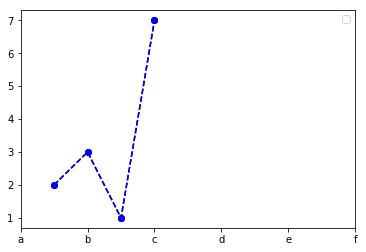

In [198]:
#matplotlib
plt.plot([1,2,3,4],[2,3,1,7], 'o--k') #dot line and color
plt.plot([1,2,3,4],[2,3,1,7], 'o--b') 
#plt.title()
#plt.xlabel()
plt.xlim(0,5)
plt.xticks(np.arange(0,11,2),['a','b','c','d','e','f'])
plt.legend()
plt.show() # one call of plt.show() will show all plots in one 

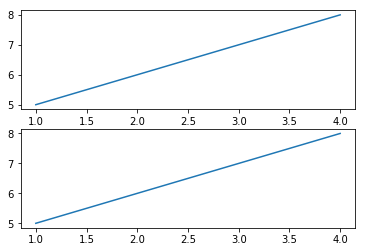

In [204]:
#画布与子图
#df.plot()   df can be directly plotted
#plt.show()
#画布figure 子图subplot 调节子图间距subplots(left,bottom, right, top, wspace, hspace)
fig=plt.figure()
ax1=fig.add_subplot(2,1,1) # 2 rows, 2 columns, position 1
ax1.plot([1,2,3,4],[5,6,7,8])
ax2=fig.add_subplot(2,1,2)
ax2.plot([1,2,3,4],[5,6,7,8])
fig.show()

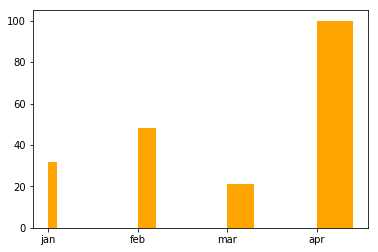

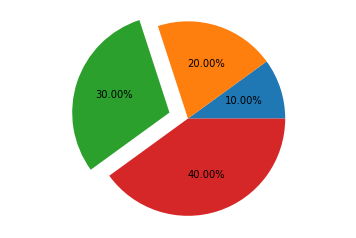

In [228]:
#其他图类型 boxplot barh pie
data=[32,48,21,100]
labels=['jan','feb','mar','apr']
plt.bar(np.arange(len(data)),data,color='orange',width=[0.1,0.2,0.3,0.4],align='edge')
plt.xticks(np.arange(len(data)),labels)
plt.show()

plt.pie([10,20,30,40],autopct='%.2f%%',explode=[0,0,0.2,0])
plt.axis('equal')
plt.show()

In [7]:
#绘制k线图
#fig.plt.figure()
#ax=fig.add_subplot(1,1,1)
#arr=df[['time','open','close','high','low']].values
#fin.candlestick_ochl(ax,arr)
#fig.grid()
#fig.show()

NameError: name 'fig' is not defined

In [7]:
#tushare package
df=ts.get_k_data('601318')
#ts.get_today_all()
#get_index()

[Getting data:]#########################################

KeyboardInterrupt: 

In [10]:
#股票分析作业
df=ts.get_k_data('600519',start='1988-01-01')
df.to_csv('600519.csv')

In [15]:
df=pd.read_csv('600519.csv',index_col='date',parse_dates=['date'])[['open','close','high','low']]

,open,close,high,low
date,,,,
2001-08-27,5.392,5.554,5.902,5.132
2001-08-28,5.467,5.759,5.781,5.407
2001-08-29,5.777,5.684,5.781,5.640
2001-08-30,5.668,5.796,5.860,5.624
2001-08-31,5.804,5.782,5.877,5.749
2001-09-03,5.812,5.779,5.870,5.757
2001-09-04,5.782,5.852,5.949,5.762
2001-09-05,5.876,5.849,5.924,5.813
2001-09-06,5.835,5.734,5.854,5.704


In [ ]:
#双均线分析作业1

In [ ]:
#双均线分析作业2

In [ ]:
#量化策略1